In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import pytpc

import sys
sys.path.insert(0, '../modules/')
import dataDiscretization as dd

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Real Data

In [31]:
data_path = '../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [32]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

Int64Index([  12,   24,   31,   55,   60,   65,   67,   70,   72,   78,
            ...
             976,  978,  980,  984,  989,  993,  994,  998, 1000, 1001],
           dtype='int64', length=215)


In [33]:
i = 0

(0.0, 1250.0, -275.0, 275.0)

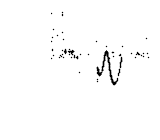

In [34]:
i += 1

real_evt = file[p_indices[i]]

real_xyzs = real_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(real_xyzs[:,2], real_xyzs[:,1],'.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/real-test_128_smallpts.png')

# Simulated Data 

In [7]:
hdfpath = '../data/tilt/p_40000_tilt.h5'
simfile = pytpc.HDFDataFile(hdfpath, 'r')

In [8]:
i = 0

(0.0, 1250.0, -275.0, 275.0)

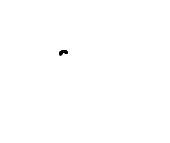

In [9]:
#i += 1

sim_evt = simfile[i]

sim_xyzs = sim_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=False, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

In [10]:
simnoise_xyzs = dd.addNoise(sim_xyzs)
print(sim_xyzs.shape)
print(simnoise_xyzs.shape)

(20, 4)
(58, 4)


(0.0, 1250.0, -275.0, 275.0)

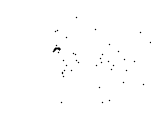

In [22]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(simnoise_xyzs[:,2], simnoise_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

# Simulated Pure Noise Events

In [12]:
empty_evt = np.empty([1,4])
junk_evt = dd.addNoise(empty_evt)

In [13]:
print(noise_evt.shape)

NameError: name 'noise_evt' is not defined

(0.0, 1250.0, -275.0, 275.0)

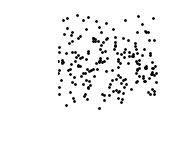

In [14]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(junk_evt[:,2], junk_evt[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/simnoise-test.png')

# Small portion of plot for use in thesis

In [15]:
from PIL import Image as pil_image
from keras.preprocessing.image import img_to_array, array_to_img, load_img
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [16]:
img_path = '../plots/results/thesis/'
file_path = 'small-img-CNN.png'

In [17]:
img = load_img(img_path + file_path, grayscale=True)#, target_size=(28,28))
#img.show()

In [18]:
img_array = img_to_array(img)
img_array = np.reshape(img_array, (img_array.shape[0], img_array.shape[1]))
img_array = img_array.astype(int)
np.savetxt("../plots/results/thesis/small-img-CNN.csv", img_array, delimiter=",")
print(img_array.shape)

(25, 25)


In [19]:
df = pd.DataFrame(img_array)

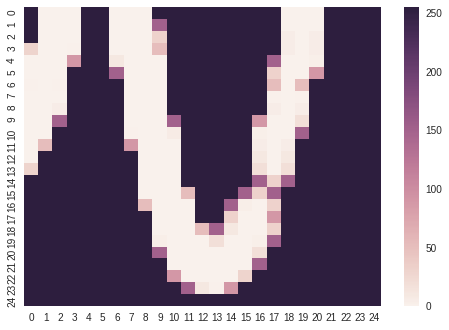

In [20]:
sns.heatmap(df)

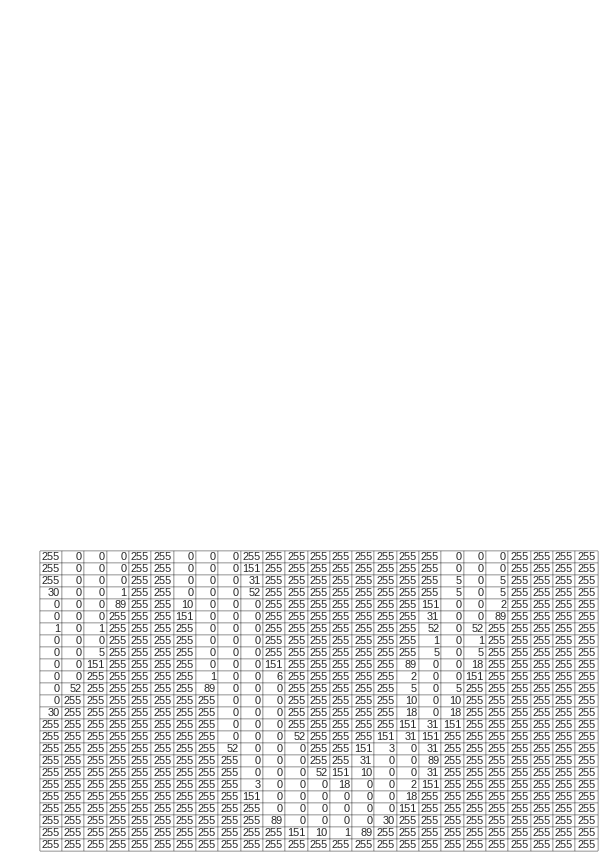

In [21]:
fig, axs = plt.subplots(1,1, figsize=(10, 10))
axs.axis('tight')
axs.axis('off')

the_table = plt.table(cellText=img_array, fontsize=20)
table = axs.add_table(the_table)

table.set_fontsize(20)

# Larger Version for Cart Engrave

In [35]:
data_path = '../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [36]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

Int64Index([  12,   24,   31,   55,   60,   65,   67,   70,   72,   78,
            ...
             976,  978,  980,  984,  989,  993,  994,  998, 1000, 1001],
           dtype='int64', length=215)


In [42]:
i = 0

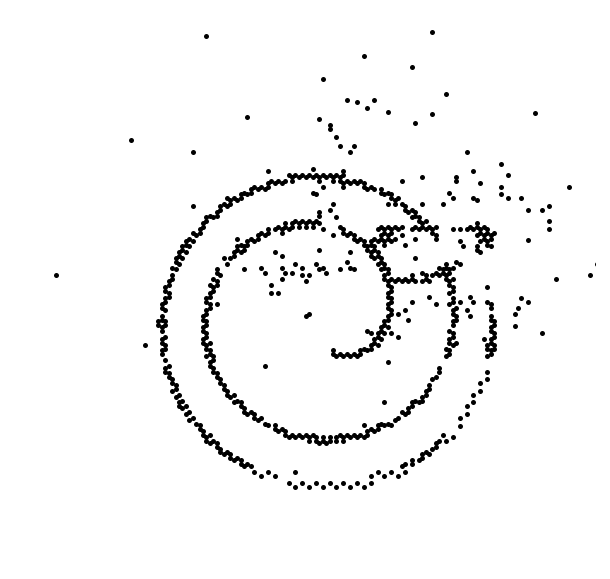

In [103]:
#i += 1

real_evt = file[p_indices[i]]

real_xyzs = real_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)

plt.figure(figsize=(10.0, 10.0))

plt.plot(real_xyzs[:,0], real_xyzs[:,1],'.', markersize=10, c='black')
plt.xlim((-200.0, 200.0))
plt.ylim((-200.0, 200.0))

plt.axis('off')

plt.savefig('../plots/results/cart-evt-use.png')